<a href="https://colab.research.google.com/github/visionNoob/Keras_Tutorial/blob/master/Keras_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형 회귀) 예제

# 1. 라이브러리 불러오기

In [0]:
# 1.라이브러리 불러오기
import tensorflow as tf # 딥러닝 라이브러리
import keras # 딥러닝 라이브러리
import numpy as np # 수학 계산 라이브러리
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 

#항상 버전 확인은 필수
print(tf.__version__)
print(keras.__version__)

1.14.0
2.2.5


# 2. 랜덤 시드 설정하기 (중요!)
https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [0]:
# 2.랜덤 시드 고정하기
import random
seed_value = 42 # 랜덤 시드

random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 3. 데이터셋

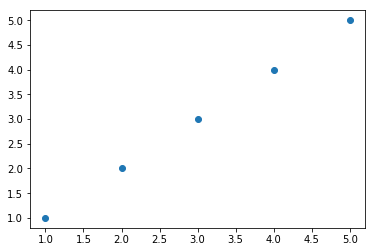

In [0]:
# 3. 데이터셋
# 입력 데이터
input_data = np.array([1, 2, 3, 4, 5])

# 출력 데이터 (정답)
output_data = np.array([1, 2, 3, 4, 5]) 

# 표로 출력
plt.plot(input_data, output_data, 'o')
plt.show()

# 4. 모델 만들기

In [0]:
# 4.모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Dense
          (units=1, input_shape=(1,),
           activation=None))

# 5. 모델 학습과정 설정하기

In [0]:
# 5.모델 학습과정 설정하기
model.compile(loss='mse', 
              optimizer='sgd', 
              metrics=['mse'])

# 6. 모델 학습시키기

In [0]:
# 6.모델 학습시키기
history = model.fit(input_data, 
                    output_data, 
                    epochs=200, 
                    batch_size=4)

Epoch 1/200
5/5 [==============================] - 0s 19ms/step - loss: 4.6822 - mean_squared_error: 4.6822
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6062 - mean_squared_error: 1.6062
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2511 - mean_squared_error: 0.2511
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 10/200
5/5 [==================

# 7.결과 출력

dict_keys(['loss', 'mean_squared_error'])


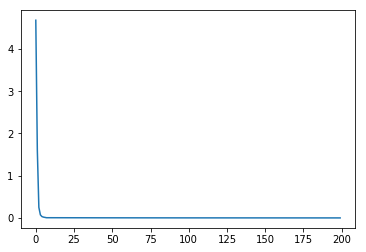

In [0]:
# Loss 출력
print(history.history.keys())
plt.plot(history.history['loss'])
plt.show()

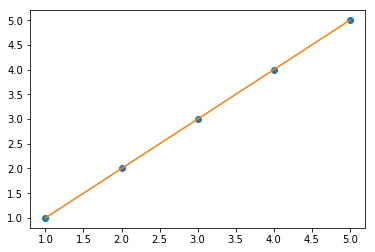

In [0]:
# 예측값 출력
yhat = model.predict(input_data)

plt.plot(input_data, output_data, 'o')
plt.plot(input_data, output_data)
plt.show()

# 8. 모델 테스트

In [0]:
# 8.모델 테스트

# 테스트 입력 데이터
input_testdata = np.array(
    [1.5, 2.5, 3.5, 4.5, 5.5])

# 테스트 출력 데이터 (정답)
output_testdata = np.array(
    [1.5, 2.5, 3.5, 4.5, 5.5]) 

evalute_result = model.evaluate(input_testdata, 
                                output_testdata, 
                                batch_size=4)
print(evalute_result)

5/5 [==============================] - 0s 6ms/step
[0.0003084124531596899, 0.0003084124531596899]


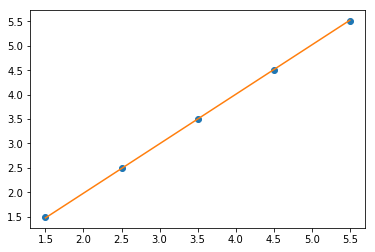

In [47]:
yhat = model.predict(input_testdata)

# 표로 출력
plt.plot(input_testdata, output_testdata, 'o')
plt.plot(input_testdata, yhat)
plt.show()